# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Yusna Millaturrosyidah
- **Email:** yusnarosyidah2@gmail.com
- **ID Dicoding:** yusnamilla

## Menentukan Pertanyaan Bisnis

- Bagaimana pola nilai pembayaran untuk setiap jenis pembayaran?
- Bagaimana karakteristik demografis seller berdasarkan kota asal mereka?
- Pada bulan apa terjadi penjualan paling tinggi sepanjang tahun 2018?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
customer_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/customers_dataset.csv")
customer_df.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [85]:
geolocation_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/geolocation_dataset.csv")
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
payments_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/order_payments_dataset.csv")
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
reviews_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/order_reviews_dataset.csv")
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
order_dataset_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/orders_dataset.csv")
order_dataset_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/dataset/ECommercePublicDataset/sellers_dataset.csv")
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

In [11]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customer_df.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [13]:
customer_df.duplicated().sum()

0

In [14]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [86]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [87]:
geolocation_df.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [91]:
geolocation_df.duplicated().sum()

0

In [89]:
geolocation_df.describe(include='all')

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [15]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [16]:
order_items_df.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [17]:
order_items_df.duplicated().sum()

0

In [18]:
order_items_df.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [19]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [20]:
payments_df.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [21]:
payments_df.duplicated().sum()

0

In [22]:
payments_df.describe(include='all')

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [23]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [24]:
reviews_df.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [25]:
reviews_df.duplicated().sum()

0

In [26]:
reviews_df.describe(include='all')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


In [27]:
order_dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [28]:
order_dataset_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [29]:
order_dataset_df.duplicated().sum()

0

In [30]:
order_dataset_df.describe(include='all')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [31]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [32]:
products_df.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [33]:
products_df.duplicated().sum()

0

In [34]:
products_df.describe(include='all')

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [35]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [36]:
sellers_df.isna().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [37]:
sellers_df.duplicated().sum()

0

In [38]:
sellers_df.describe(include='all')

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


### Cleaning Data

Membersihkan Data reviews_df

In [39]:
reviews_df[reviews_df.review_comment_title.isna()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [40]:
reviews_df.review_comment_title.value_counts()

Recomendo                    423
recomendo                    345
Bom                          293
super recomendo              270
Excelente                    248
                            ... 
Luminaria sobrepor led 18      1
Não recebi.                    1
produto com lacre violado      1
Atraso Entrega                 1
Foto enganosa                  1
Name: review_comment_title, Length: 4527, dtype: int64

In [41]:
reviews_df.review_comment_title.fillna(value="Recomendo", inplace=True)

In [42]:
reviews_df.review_comment_message.value_counts()

Muito bom                                                                                                                                                                                              230
Bom                                                                                                                                                                                                    189
muito bom                                                                                                                                                                                              122
bom                                                                                                                                                                                                    107
Recomendo                                                                                                                                                                                   

In [43]:
reviews_df.review_comment_message.fillna(value="Muito bom", inplace=True)

Membersihkan Data geolocation_df

In [90]:
geolocation_df.drop_duplicates(inplace=True)

Membersihkan Data products_df

In [44]:
products_df[products_df.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [45]:
products_df.dropna(subset=['product_weight_g'], inplace=True)
products_df.dropna(subset=['product_length_cm'], inplace=True)
products_df.dropna(subset=['product_height_cm'], inplace=True)
products_df.dropna(subset=['product_width_cm'], inplace=True)

Kode tersebut digunakan untuk menghapus baris-baris dari DataFrame yang memiliki nilai yang hilang (NaN) di kolom-kolom diataas, sehingga hanya baris-baris yang memiliki nilai yang valid dalam kolom tersebut yang akan dipertahankan dalam DataFrame.

In [46]:
products_df.product_category_name.value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

In [47]:
products_df.product_category_name.fillna(value="cama_mesa_banho", inplace=True)

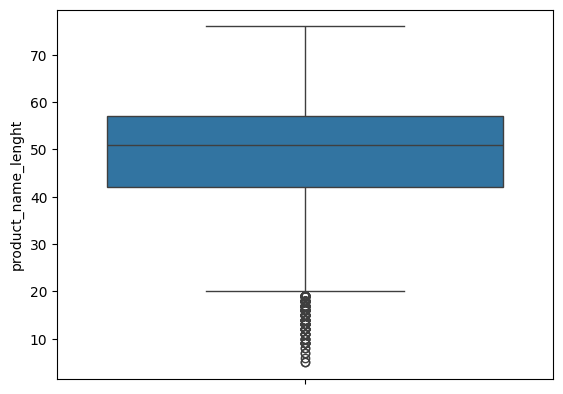

In [48]:
productn_lenght = sn.boxplot(products_df['product_name_lenght'])

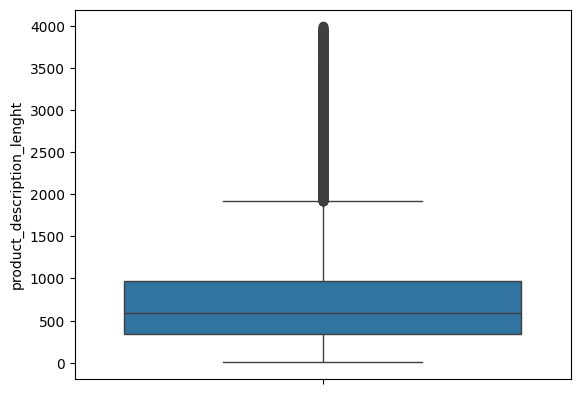

In [49]:
productd_lenght = sn.boxplot(products_df['product_description_lenght'])

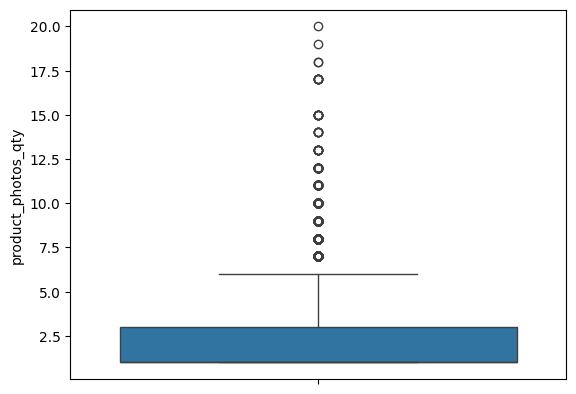

In [50]:
product_photos = sn.boxplot(products_df['product_photos_qty'])

In [51]:
products_df['product_name_lenght'].fillna(products_df['product_name_lenght'].mean(), inplace=True)
products_df['product_description_lenght'].fillna(products_df['product_description_lenght'].median(), inplace=True)
products_df['product_photos_qty'].fillna(products_df['product_photos_qty'].median(), inplace=True)

Membersihkan data order_dataset_df

In [52]:
order_dataset_df[order_dataset_df.order_delivered_customer_date.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00
99313,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,NaN,NaN,2018-02-06 00:00:00
99347,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,NaN,NaN,NaN,2018-09-27 00:00:00
99348,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,NaN,NaN,2017-09-15 00:00:00


In [53]:
order_dataset_df.order_delivered_customer_date.value_counts()

2018-05-08 23:38:46    3
2016-10-27 17:32:07    3
2018-02-14 21:09:19    3
2017-06-19 18:47:51    3
2018-05-08 19:36:48    3
                      ..
2018-07-12 17:48:45    1
2018-05-18 18:24:36    1
2018-01-17 13:29:13    1
2018-06-29 11:21:34    1
2018-03-16 13:08:30    1
Name: order_delivered_customer_date, Length: 95664, dtype: int64

In [54]:
order_dataset_df.order_delivered_carrier_date.value_counts()

2018-05-09 15:48:00    47
2018-05-10 18:29:00    32
2018-05-07 12:31:00    21
2018-05-02 15:15:00    16
2018-07-24 16:07:00    16
                       ..
2018-01-03 17:37:21     1
2017-10-27 20:07:58     1
2017-11-21 18:57:37     1
2018-03-21 20:03:37     1
2018-03-09 22:11:59     1
Name: order_delivered_carrier_date, Length: 81018, dtype: int64

In [55]:
order_dataset_df.order_approved_at.value_counts()

2018-02-27 04:31:10    9
2017-11-07 07:30:38    7
2018-02-27 04:31:01    7
2018-02-06 05:31:52    7
2017-11-07 07:30:29    7
                      ..
2018-08-22 11:50:14    1
2017-09-22 11:27:36    1
2018-03-07 16:40:32    1
2017-08-08 10:50:15    1
2018-03-09 11:20:28    1
Name: order_approved_at, Length: 90733, dtype: int64

In [56]:
order_dataset_df[order_dataset_df.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,2018-09-12 00:00:00
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaN,NaN,NaN,2018-10-17 00:00:00
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaN,NaN,NaN,2017-04-10 00:00:00
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaN,NaN,NaN,2018-09-13 00:00:00
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaN,NaN,NaN,2017-05-30 00:00:00
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaN,NaN,NaN,2017-07-25 00:00:00
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaN,NaN,NaN,2017-10-16 00:00:00
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaN,NaN,NaN,2018-08-10 00:00:00
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaN,NaN,NaN,2018-10-01 00:00:00


Setelah diamati, untuk tabel order_dataset tidak perlu diisi missing value nya karena untuk orderan yang statusnya "canceled" memang tidak memiliki data.

Mengganti beberapa tipe data yang kurang sesuai

In [57]:
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  order_items_df[column] = pd.to_datetime(order_items_df[column])

In [58]:
datetime_columns = ["review_creation_date", "review_answer_timestamp"]
for column in datetime_columns:
  reviews_df[column] = pd.to_datetime(reviews_df[column])

In [59]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  order_dataset_df[column] = pd.to_datetime(order_dataset_df[column])

Terdapat beberapa atribut yang harus diganti tipe datanya menjadi "datetime" supaya memungkinkan menipulasi dan analisis waktu mudah untuk dilakukan.

## Exploratory Data Analysis (EDA)

### Explorasi Data customer_df

In [63]:
customer_df.sample(10)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
52162,79cfcbd00dfce1c4e9208032ab7aab15,acaf5177d6de60fda7ce77c48abb5230,8674,suzano,SP
16767,79b2d0f76b70f50f1321dd107498329a,3eb7583972f966580cd810306c3b5277,23890,seropedica,RJ
59410,f530cd146d415bcd0315b147bb8774f6,fcd67dd409ba74d97fe970e4e0ba189d,20271,rio de janeiro,RJ
1474,f04018667ff9194bbaaf6aa27934ac56,87e5b2ef0c9dd7a455bea05c99177c27,8473,sao paulo,SP
40260,3c80d9695c40154d0b7880e506e5f648,53a727d7d348290e7267679b5c6a45b1,28350,laje do muriae,RJ
71894,bc27754b418ead128c0fd41cc14f81a2,c1c0e094a7fbde66794da6ee9f9d1dda,85852,foz do iguacu,PR
80432,7c82476c0f50a544581f32a8b7d7eda1,ca5603041135a39ce140c89dc0175d1e,72318,brasilia,DF
82126,7c9bd29ba762dee02252ee11180a5f08,bf8ab3ba6ca853953bd935b022355cf9,44033,feira de santana,BA
11847,3c7b80343c2c11f71434110e462e3de1,ff4befb3408bb43643f743991ccd282c,21320,rio de janeiro,RJ
59198,359ef52d8f7d03963687f1f864794d2c,f1f283e43e508bdcf11877883651e51e,2210,sao paulo,SP


In [64]:
customer_df.customer_zip_code_prefix.is_unique

False

In [65]:
customer_df.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


### Explorasi Data payments_df

In [66]:
payments_df.sample(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
81966,e5abf89c50ab4087ce3b700ae5dac49a,1,credit_card,1,59.13
37607,3a832277787e9783a3efdd6f49781a77,1,credit_card,2,92.50
14123,2788c37316cfd96e71107c07b22454c5,1,credit_card,4,107.17
90423,7b69c36bb030670f6cdf3f18ef627824,1,credit_card,1,39.44
47301,a0aa66ea6d606142d5df626b13b033c3,1,credit_card,1,30.78
101885,23c6b96eb0aa6024129f306af7befe3e,1,credit_card,2,139.22
6860,788634b6e1564dce8d0833139af74c07,1,credit_card,9,91.66
69440,f6e2898af2dbe4582426003c31aedaf1,1,credit_card,3,32.70
70488,755dd61fa0b225c0a149662ea67cd5ff,1,boleto,1,73.84
12710,87ef789179736a942af20c37ae5f53a8,1,credit_card,4,305.77


In [67]:
jenis_pembayaran = payments_df['payment_type'].unique()
print(jenis_pembayaran)

['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']


### Explorasi Data reviews_df

In [68]:
reviews_df.describe(include='all')

<ipython-input-68-6de5ff885a14>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include='all')
<ipython-input-68-6de5ff885a14>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  reviews_df.describe(include='all')


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,99224,99224,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,88079,58477,463,4
first,NaN,NaN,NaN,NaN,NaN,2016-10-02 00:00:00,2016-10-07 18:32:28
last,NaN,NaN,NaN,NaN,NaN,2018-08-31 00:00:00,2018-10-29 12:27:35
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN


In [69]:
reviews_df.agg({
    "review_score": ["min", "max"],
    "review_comment_title": "count",
    "review_comment_message": "count",
    "review_creation_date": "count",
    "review_answer_timestamp": "count"
})


,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
min,1.0,NaN,NaN,NaN,NaN
max,5.0,NaN,NaN,NaN,NaN
count,NaN,99224.0,99224.0,99224.0,99224.0


### Explorasi Data order_dataset_df

In [70]:
unique_order_status = order_dataset_df['order_status'].unique()
print(unique_order_status)

['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'canceled'
 'created' 'approved']


### Explorasi Data products_df

In [71]:
products_df.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
19336,a9b36aaa68ebd315701524c822800f29,moveis_decoracao,54.0,532.0,1.0,550.0,70.0,7.0,11.0
2934,635eab616d6a1f8033986a59061d6ede,papelaria,59.0,248.0,4.0,1800.0,45.0,8.0,30.0
18130,94475071013412139f862c0bd7e3bb37,papelaria,46.0,708.0,3.0,317.0,22.0,14.0,22.0
10635,26cb1187a1582777242a5907bdaae664,esporte_lazer,43.0,843.0,3.0,1067.0,20.0,7.0,15.0
31852,3bdc103ff400f1e4c1136dfe4ebadbd1,moveis_decoracao,48.0,593.0,1.0,250.0,16.0,5.0,20.0
12406,0e6e9a3510d7c927145921c00077a726,beleza_saude,27.0,259.0,4.0,200.0,16.0,2.0,11.0
10548,4b7e33b62e843418e0e924285c374739,brinquedos,43.0,225.0,1.0,300.0,45.0,15.0,35.0
874,7aeaa8f3e592e380c420e8910a717255,eletrodomesticos,37.0,1642.0,10.0,5500.0,29.0,37.0,25.0
14546,d0825229639d1afa9bd533314e27d7c8,moveis_decoracao,63.0,1952.0,2.0,21700.0,42.0,42.0,42.0
9167,b07c988c725ddd67d0c7572a8099712d,moveis_decoracao,59.0,586.0,1.0,600.0,24.0,2.0,24.0


In [72]:
max_description_length = products_df['product_description_lenght'].max()
min_description_length = products_df['product_description_lenght'].min()

print("max:", max_description_length)
print("min:", min_description_length)


max: 3992.0
min: 4.0


### Explorasi Data sellers_df

In [73]:
sellers_df.seller_zip_code_prefix.is_unique

False

In [74]:
seller_count_by_state = sellers_df['seller_state'].value_counts()
print(seller_count_by_state)


SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
RN       5
MS       5
MT       4
RO       2
SE       2
PI       1
AC       1
MA       1
AM       1
PA       1
Name: seller_state, dtype: int64


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola nilai pembayaran untuk setiap jenis pembayaran?

In [75]:
# Menghitung total pembayaran untuk setiap jenis pembayaran
total_payments_by_type = payments_df.groupby('payment_type')['payment_value'].sum()

# Mengurutkan dari yang terbesar
total_payments_by_type = total_payments_by_type.sort_values(ascending=False)

print(total_payments_by_type)

payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
not_defined           0.00
Name: payment_value, dtype: float64


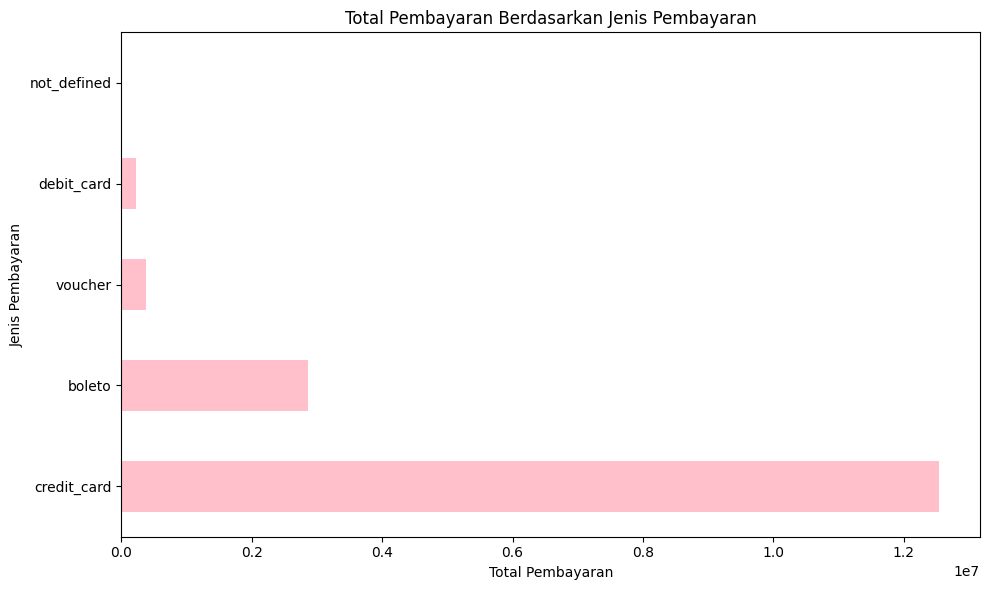

In [76]:
# Menghitung total pembayaran untuk setiap jenis pembayaran dan mengurutkannya
total_payments_by_type = payments_df.groupby('payment_type')['payment_value'].sum().sort_values(ascending=False)

# Membuat horizontal bar chart dengan satu warna
plt.figure(figsize=(10, 6))
total_payments_by_type.plot(kind='barh', color='pink')
plt.title('Total Pembayaran Berdasarkan Jenis Pembayaran')
plt.ylabel('Jenis Pembayaran')
plt.xlabel('Total Pembayaran')
plt.tight_layout()
plt.show()


### Pertanyaan 2: Bagaimana karakteristik demografis seller berdasarkan kota asal mereka?

In [77]:
# Menghitung jumlah penjual berdasarkan kota asal mereka
seller_count_by_city = sellers_df['seller_city'].value_counts().reset_index()
seller_count_by_city.columns = ['seller_city', 'seller_count']

# Menampilkan beberapa baris pertama hasil analisis
print("Jumlah penjual berdasarkan kota asal mereka:")
print(seller_count_by_city.head())

Jumlah penjual berdasarkan kota asal mereka:
      seller_city  seller_count
0       sao paulo           694
1        curitiba           127
2  rio de janeiro            96
3  belo horizonte            68
4  ribeirao preto            52


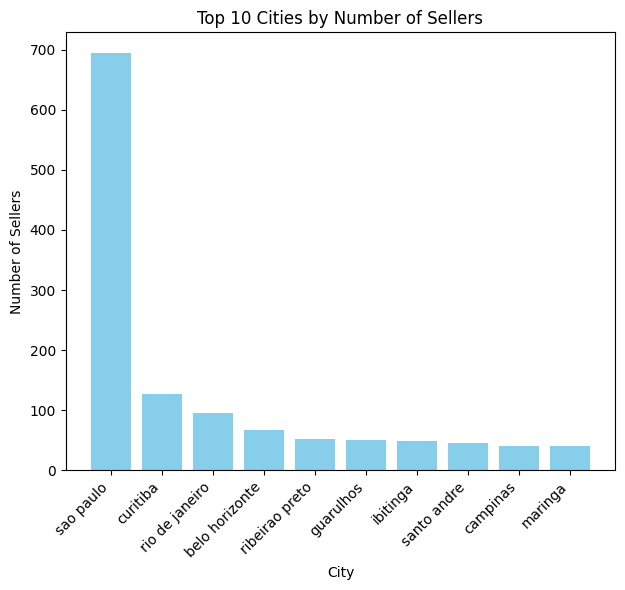

In [78]:
# Mengatur ukuran gambar
plt.figure(figsize=(12, 6))

# Visualisasi jumlah penjual berdasarkan kota asal mereka
plt.subplot(1, 2, 1)
plt.bar(seller_count_by_city['seller_city'][:10], seller_count_by_city['seller_count'][:10], color='skyblue')
plt.title('Top 10 Cities by Number of Sellers')
plt.xlabel('City')
plt.ylabel('Number of Sellers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Menampilkan visualisasi
plt.show()

### Pertanyaan 3: Pada bulan apa terjadi penjualan paling tinggi sepanjang tahun 2018?

In [79]:
# Mengonversi order_purchase_timestamp ke tipe datetime
order_dataset_df['order_purchase_timestamp'] = pd.to_datetime(order_dataset_df['order_purchase_timestamp'])

# Ekstraksi bulan dari order_purchase_timestamp
order_dataset_df['order_month'] = order_dataset_df['order_purchase_timestamp'].dt.month

# Menghitung jumlah pesanan untuk setiap bulan
monthly_orders = order_dataset_df.groupby('order_month').size()

# Menemukan bulan dengan pesanan tertinggi
highest_month = monthly_orders.idxmax()

print("Bulan dengan penjualan tertinggi pada tahun 2018:", highest_month)

Bulan dengan penjualan tertinggi pada tahun 2018: 8


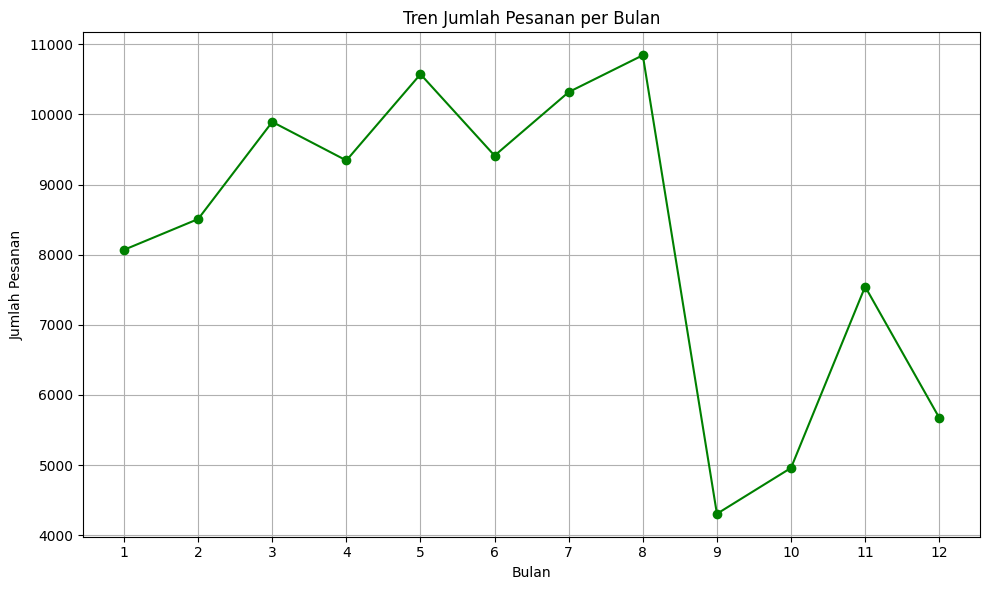

In [80]:
# Membuat line plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_orders.index, monthly_orders.values, marker='o', color='green', linestyle='-')
plt.title('Tren Jumlah Pesanan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Pesanan')
plt.xticks(monthly_orders.index)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1 (Bagaimana pola nilai pembayaran untuk setiap jenis pembayaran?) : Berdasarkan analisis pola nilai pembayaran untuk setiap jenis pembayaran, dapat disimpulkan bahwa:

  - Kartu Kredit (Credit Card) memiliki total pembayaran tertinggi dibandingkan dengan jenis pembayaran lainnya. Hal ini menunjukkan bahwa mayoritas pelanggan lebih memilih menggunakan kartu kredit untuk melakukan pembayaran.

  - Selanjutnya ada Boleto yang memiliki total pembayaran tertinggi kedua. Boleto adalah metode pembayaran yang populer di Brasil dan digunakan oleh sebagian besar konsumen di negara tersebut.

  - Voucher memiliki total pembayaran terendah dari semua jenis pembayaran. Ini menunjukkan bahwa penggunaan voucher mungkin kurang populer atau kurang umum dibandingkan dengan metode pembayaran lainnya.

  Sehingga, dapat disimpulkan bahwa kartu kredit adalah metode pembayaran paling umum dan paling sering digunakan, sedangkan voucher memiliki tingkat penggunaan yang lebih rendah.

- Conclution pertanyaan 2 (Bagaimana karakteristik demografis seller berdasarkan kota asal mereka?) : Berdasarkan analisis karakteristik demografis penjual (sellers) berdasarkan kota asal mereka, dapat disimpulkan bahwa São Paulo adalah kota dengan jumlah penjual terbanyak di Brasil. Fakta ini menandakan bahwa São Paulo memiliki populasi penjual yang besar dan menjadi pusat aktivitas perdagangan online di negara tersebut. Sementara itu, Rio de Janeiro berada di peringkat kedua dalam jumlah penjual, menunjukkan bahwa kota ini juga memiliki sejumlah besar penjual aktif, meskipun lebih sedikit dibandingkan dengan São Paulo. Selain itu, kota-kota seperti Belo Horizonte, Curitiba, dan Porto Alegre juga memiliki jumlah penjual yang signifikan meskipun jumlahnya lebih rendah daripada São Paulo dan Rio de Janeiro. Kesimpulan ini memberikan gambaran tentang distribusi geografis penjual di Brasil dan dapat menjadi dasar untuk pengembangan strategi pemasaran dan distribusi yang lebih efektif di berbagai kota.

- Conclution pertanyaan 3 (Pada bulan apa terjadi penjualan paling tinggi sepanjang tahun 2018?) : Berdasarkan analisis, dapat disimpulkan bahwa pada tahun 2018, bulan Agustus (bulan ke-8) adalah bulan dengan penjualan tertinggi sepanjang tahun. Dari visualisasi tren jumlah pesanan per bulan, terlihat bahwa jumlah pesanan bervariasi sepanjang tahun 2018. Namun, puncak tertinggi terjadi pada bulan Agustus, sesuai dengan temuan analisis. Kesimpulan ini dapat membantu dalam merencanakan strategi pemasaran dan operasional untuk tahun-tahun berikutnya. Mereka dapat memperkuat promosi dan penawaran spesial selama bulan-bulan dengan penjualan tinggi, sambil memperhatikan faktor-faktor eksternal yang mungkin mempengaruhi perilaku pembelian pelanggan.

In [81]:
merged_data = pd.merge(customer_df, order_dataset_df, on='customer_id', how='inner')

In [82]:
merged_data = pd.merge(merged_data, payments_df, on='order_id', how='inner')

In [83]:
merged_data = pd.merge(merged_data, reviews_df, on='order_id', how='inner')

In [84]:
merged_data

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1,credit_card,2,146.87,88b8b52d46df026a9d1ad2136a59b30b,4,Recomendo,Muito bom,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1,credit_card,8,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5,Recomendo,Muito bom,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1,credit_card,7,157.73,5ad6695d76ee186dc473c42706984d87,5,Recomendo,Muito bom,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1,credit_card,1,173.30,059a801bb31f6aab2266e672cab87bc5,5,Recomendo,Muito bom,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1,credit_card,8,252.25,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103672,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,1,credit_card,6,88.78,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,Muito bom,2018-04-14,2018-04-28 11:15:04
103673,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,1,credit_card,3,129.06,b273b431c3aedb4eed18643309652940,5,Recomendo,Muito bom,2018-04-12,2018-04-16 10:36:05
103674,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1,credit_card,5,56.04,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04,2018-05-08 01:41:07
103675,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,1,credit_card,2,711.07,0bcdc9e450ea500811a8d39ee993cd47,5,Recomendo,Muito bom,2017-11-17,2017-11-19 23:34:18


In [ ]:
merged_data = pd.merge(merged_data, order_items_df, on='order_id', how='inner')

In [ ]:
merged_data = pd.merge(merged_data, sellers_df, on='seller_id', how='inner')

In [ ]:
merged_data.to_csv("all_data.csv", index=False)